# K-Means Clustering

This notebook applies **K-Means** to identify spatial and temporal patterns in the dataset.
We make use of the [helper_functions.py](./helper_functions.py) script to extract and preprocess from the xarray object and to visualize the clusterings.  

Also see:
- [Data Acquisition](./data.acquisition.ipynb)  
- [Exploratory Data Analysis](./eda.ipynb)


In [1]:
!pip install -q -r ../../requirements.txt &> /dev/null

In [2]:
import importlib
from ipywidgets import FloatSlider
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from ipywidgets import interact, IntSlider
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

import sys
sys.path.append("../")
import helper_functions
importlib.reload(helper_functions)

<module 'helper_functions' from '/home/jovyan/spatiotemporal-mining-medsea/information_filtering/no_trend_removement/results/../helper_functions.py'>

In [3]:
ds = xr.open_dataset("/home/jovyan/spatiotemporal-mining-medsea/data/medsea.nc")

In [4]:
print([f"{d:.2f}" for d in (ds["depth"].values)])

['0.49', '1.54', '2.65', '3.82', '5.08', '6.44', '7.93', '9.57', '11.40', '13.47', '15.81', '18.50', '21.60', '25.21', '29.44', '34.43', '40.34', '47.37', '55.76', '65.81', '77.85', '92.33', '109.73', '130.67', '155.85', '186.13', '222.48', '266.04', '318.13', '380.21', '453.94', '541.09', '643.57', '763.33', '902.34', '1062.44']


Before we do the clustering, let's see which exact depth values exist. To review different patterns, we choose to make use of **47.37**, **318.13**, and **1062.44** meters.

Furthermore, we will concatenate all the features we have for one location (**temperature** and **salinity** for all three depths) to gain a comprehensive insight into the entire water *column*.


## Spatial Analysis  
In the spatial analysis, we insert the time series from all available locations. Each cluster will then contain locations that exhibit similar behavior over time.


(20811, 2052)


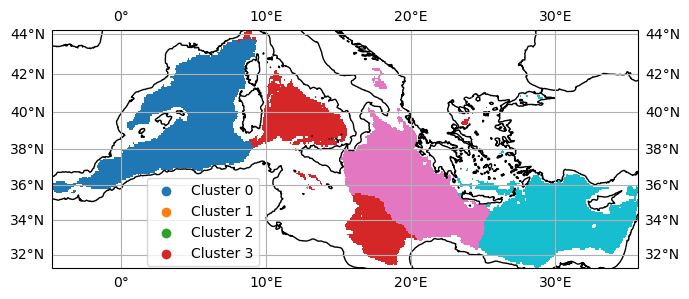

In [5]:
z_space = helper_functions.preprocessing(ds, ["thetao", "so"], [50, 300, 1000], "time", False, 1)
X_space = z_space.transpose("time", "location").values  # Shape: (n_locations, n_timepoints) / timeseries as attributes
X_space = X_space.T
print(X_space.shape)

labels_space = helper_functions.apply_kmeans(X_space, 4)
helper_functions.plot_cluster_map(z_space, labels_space)

## Temporal Analysis  
In the temporal analysis, we include all available time points, using the z-scores of each location as attributes. Each cluster then consists of time points that exhibit similar spatial behavior.

Clustering is performed using all features jointly, but we will visualize each feature separately.


(342, 167042)


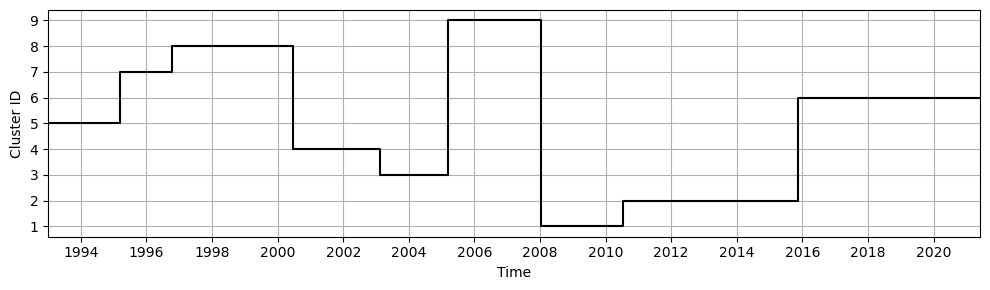

In [6]:
z_time = helper_functions.preprocessing(ds, ["thetao", "so"], [50, 300, 1000], "location", -1)
X_time = z_time.values  # Shape: (n_timepoints, n_locations)
print(X_time.shape)

labels_time = helper_functions.apply_kmeans(X_time, 9)
labels_time+=1 # Let the clusters start with '1', not '0'.
helper_functions.plot_cluster_timeline(z_time, labels_time)

To easily see the clusterings, let's reorder the assignments! 

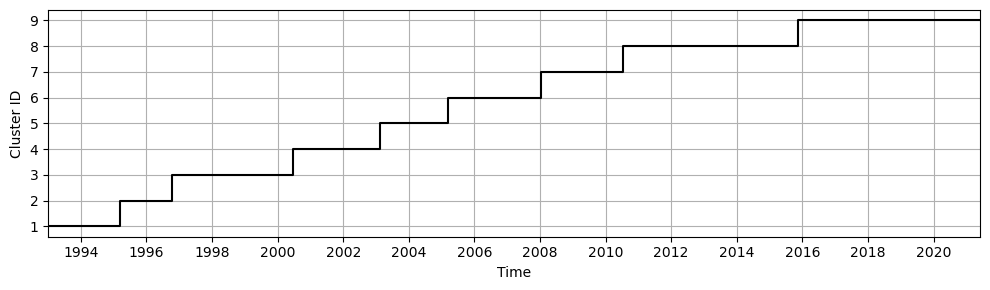

In [7]:
dict = {5: 1, 7: 2, 8: 3, 4: 4, 3: 5, 9: 6, 1: 7, 2: 8, 6: 9}
labels_time = np.array([dict[k] for k in labels_time])
helper_functions.plot_cluster_timeline(z_time, labels_time)
np.save("hungarian/kmeans.npy", labels_time)

### On 47.37 meters

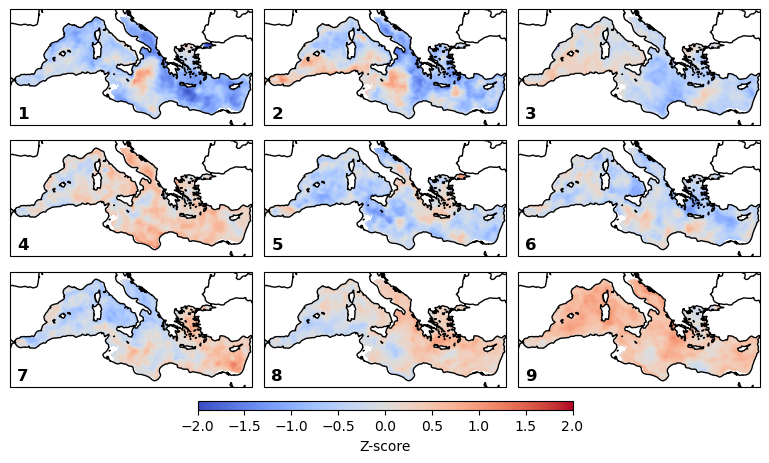

In [8]:
"""Here we preprocess only the temperature since we want
to only cluster the temperature's z-scores in the plots."""
z_d50_temp = helper_functions.preprocessing(ds, ["thetao"], [50], "location", -1)
helper_functions.plot_average_cluster(z_d50_temp, labels_time, -2, 2)

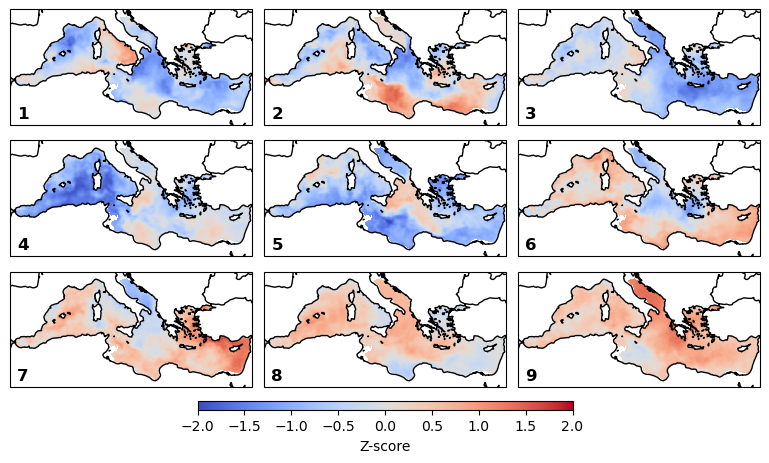

In [9]:
z_d50_so = helper_functions.preprocessing(ds, ["so"], [50], "location", -1) 
helper_functions.plot_average_cluster(z_d50_so, labels_time, -2, 2)

### 318.13 meters

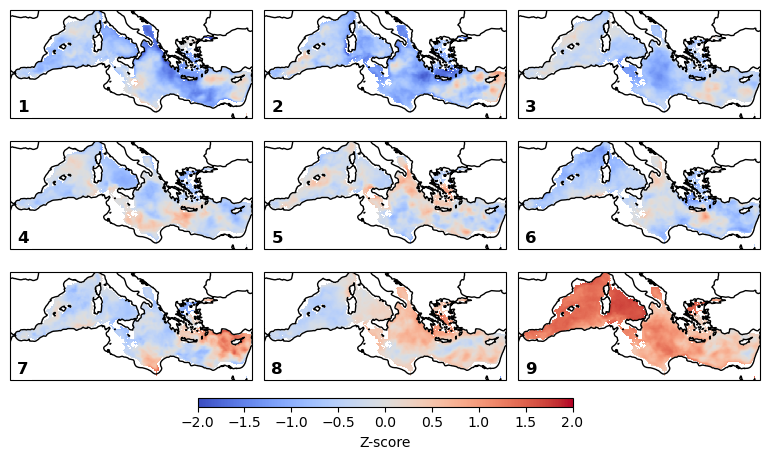

In [10]:
z_d300_temp = helper_functions.preprocessing(ds, ["thetao"], [300], "location", -1) 
helper_functions.plot_average_cluster(z_d300_temp, labels_time, -2, 2)

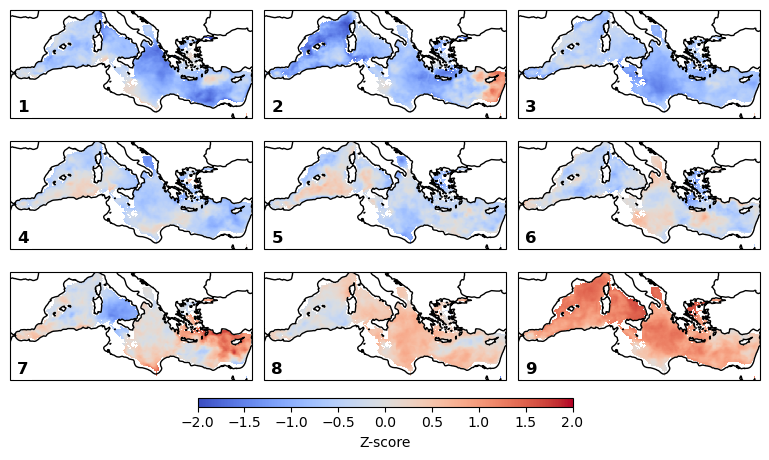

In [11]:
z_d300_so = helper_functions.preprocessing(ds, ["so"], [300], "location", -1) 
helper_functions.plot_average_cluster(z_d300_so, labels_time, -2, 2)

### 1062.44meters

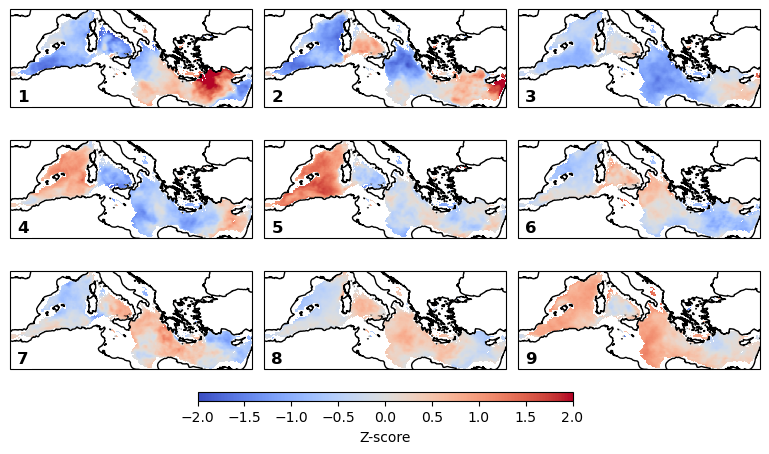

In [12]:
z_d1000_temp = helper_functions.preprocessing(ds, ["thetao"], [1000], "location", -1) 
helper_functions.plot_average_cluster(z_d1000_temp, labels_time, -2, 2)

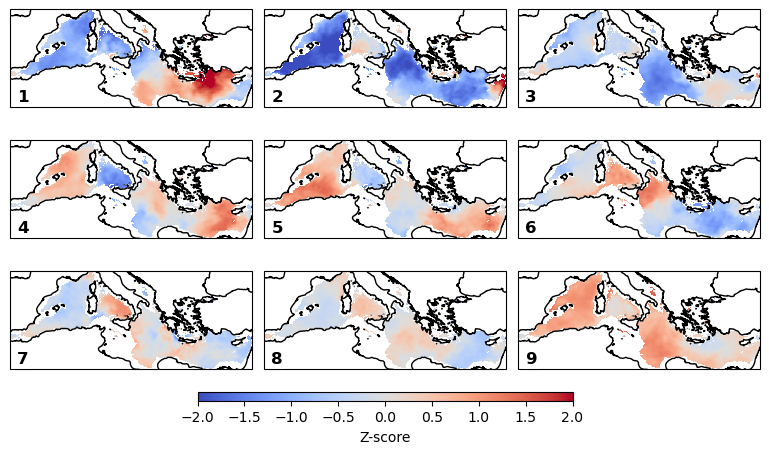

In [13]:
z_d1000_so = helper_functions.preprocessing(ds, ["so"], [1000], "location", -1) 
helper_functions.plot_average_cluster(z_d1000_so, labels_time, -2, 2)